In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
from dataset import load_svhn, random_split_train_val
from gradient_check import check_layer_gradient, check_layer_param_gradient, check_model_gradient
from layers import FullyConnectedLayer, ReLULayer
from model import TwoLayerNet
from trainer import Trainer, Dataset
from optim import SGD, MomentumSGD
from metrics import multiclass_accuracy

In [4]:
def prepare_for_neural_network(train_X, test_X):
    train_flat = train_X.reshape(train_X.shape[0], -1).astype(np.float) / 255.0
    test_flat = test_X.reshape(test_X.shape[0], -1).astype(np.float) / 255.0
    
    # Subtract mean
    mean_image = np.mean(train_flat, axis = 0)
    train_flat -= mean_image
    test_flat -= mean_image
    
    return train_flat, test_flat
    
train_X, train_y, test_X, test_y = load_svhn("../data", max_train=10000, max_test=1000)    
train_X, test_X = prepare_for_neural_network(train_X, test_X)
# Split train into train and val
train_X, train_y, val_X, val_y = random_split_train_val(train_X, train_y, num_val = 1000)

In [32]:
# TODO: Implement ReLULayer layer in layers.py
# Note: you'll need to copy implementation of the gradient_check function from the previous assignment

X = np.array([[1,-2, 3],
              [-1, 2, 0.1]
              ])

assert check_layer_gradient(ReLULayer(), X)

Gradient check passed!


In [52]:
# TODO: Implement FullyConnected layer forward and backward methods
assert check_layer_gradient(FullyConnectedLayer(3, 4), X)
# TODO: Implement storing gradients for W and B
assert check_layer_param_gradient(FullyConnectedLayer(3, 4), X, 'W')
assert check_layer_param_gradient(FullyConnectedLayer(3, 4), X, 'B')

Gradient check passed!
Gradient check passed!
Gradient check passed!


In [119]:
# TODO: In model.py, implement compute_loss_and_gradients function
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 3, reg = 0)
loss = model.compute_loss_and_gradients(train_X[:2], train_y[:2])

# TODO Now implement backward pass and aggregate all of the params
check_model_gradient(model, train_X[:2], train_y[:2])

Checking gradient for layer1_W
Gradient check passed!
Checking gradient for layer2_W
Gradient check passed!


True

In [120]:
# TODO Now implement l2 regularization in the forward and backward pass
model_with_reg = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 3, reg = 1e1)
loss_with_reg = model_with_reg.compute_loss_and_gradients(train_X[:2], train_y[:2])
assert loss_with_reg > loss and not np.isclose(loss_with_reg, loss), \
    "Loss with regularization (%2.4f) should be higher than without it (%2.4f)!" % (loss, loss_with_reg)

check_model_gradient(model_with_reg, train_X[:2], train_y[:2])

Checking gradient for layer1_W
Gradient check passed!
Checking gradient for layer2_W
Gradient check passed!


True

In [121]:
# Finally, implement predict function!

# TODO: Implement predict function
# What would be the value we expect?
multiclass_accuracy(model_with_reg.predict(train_X[:30]), train_y[:30]) 

0.1

In [145]:
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-1)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, SGD(), learning_rate = 1e-2)

# TODO Implement missing pieces in Trainer.fit function
# You should expect loss to go down every epoch, even if it's slow
loss_history, train_history, val_history = trainer.fit()

Epoch 0, Loss: 2.307691, Train accuracy: 0.107667, val accuracy: 0.112000
Epoch 1, Loss: 2.304134, Train accuracy: 0.188333, val accuracy: 0.194000
Epoch 2, Loss: 2.304930, Train accuracy: 0.196556, val accuracy: 0.205000
Epoch 3, Loss: 2.284791, Train accuracy: 0.196333, val accuracy: 0.205000
Epoch 4, Loss: 2.348477, Train accuracy: 0.196222, val accuracy: 0.201000
Epoch 5, Loss: 2.296778, Train accuracy: 0.195778, val accuracy: 0.203000
Epoch 6, Loss: 2.289093, Train accuracy: 0.195667, val accuracy: 0.204000
Epoch 7, Loss: 2.292501, Train accuracy: 0.195556, val accuracy: 0.204000
Epoch 8, Loss: 2.263762, Train accuracy: 0.195333, val accuracy: 0.204000
Epoch 9, Loss: 2.362354, Train accuracy: 0.195667, val accuracy: 0.205000
Epoch 10, Loss: 2.240366, Train accuracy: 0.195444, val accuracy: 0.204000
Epoch 11, Loss: 2.305230, Train accuracy: 0.195222, val accuracy: 0.204000
Epoch 12, Loss: 2.312209, Train accuracy: 0.195667, val accuracy: 0.204000
Epoch 13, Loss: 2.345693, Train acc

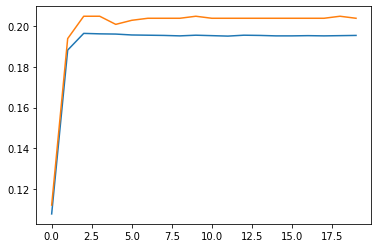

In [146]:
plt.plot(train_history)
plt.plot(val_history)

In [147]:
# TODO Implement learning rate decay inside Trainer.fit method
# Decay should happen once per epoch

model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-1)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, SGD(), learning_rate_decay=0.99)

initial_learning_rate = trainer.learning_rate
loss_history, train_history, val_history = trainer.fit()

assert trainer.learning_rate < initial_learning_rate, "Learning rate should've been reduced"
assert trainer.learning_rate > 0.5*initial_learning_rate, "Learning rate shouldn'tve been reduced that much!"

Epoch 0, Loss: 2.307665, Train accuracy: 0.149222, val accuracy: 0.141000
Epoch 1, Loss: 2.303397, Train accuracy: 0.188333, val accuracy: 0.185000
Epoch 2, Loss: 2.309555, Train accuracy: 0.195667, val accuracy: 0.203000
Epoch 3, Loss: 2.355164, Train accuracy: 0.196667, val accuracy: 0.204000
Epoch 4, Loss: 2.261761, Train accuracy: 0.197111, val accuracy: 0.202000
Epoch 5, Loss: 2.332469, Train accuracy: 0.196889, val accuracy: 0.204000
Epoch 6, Loss: 2.206761, Train accuracy: 0.196667, val accuracy: 0.204000
Epoch 7, Loss: 2.335331, Train accuracy: 0.197111, val accuracy: 0.205000
Epoch 8, Loss: 2.372841, Train accuracy: 0.196889, val accuracy: 0.205000
Epoch 9, Loss: 2.231308, Train accuracy: 0.196889, val accuracy: 0.204000
Epoch 10, Loss: 2.306652, Train accuracy: 0.197333, val accuracy: 0.204000
Epoch 11, Loss: 2.279988, Train accuracy: 0.197000, val accuracy: 0.204000
Epoch 12, Loss: 2.327024, Train accuracy: 0.197222, val accuracy: 0.204000
Epoch 13, Loss: 2.282093, Train acc

In [155]:
# TODO: Implement MomentumSGD.update function in optim.py

model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-1)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, MomentumSGD(), learning_rate=1e-4, learning_rate_decay=0.99)

# You should see even better results than before!
loss_history, train_history, val_history = trainer.fit()

Epoch 0, Loss: 2.328302, Train accuracy: 0.146667, val accuracy: 0.135000
Epoch 1, Loss: 2.324201, Train accuracy: 0.148111, val accuracy: 0.139000
Epoch 2, Loss: 2.320900, Train accuracy: 0.148222, val accuracy: 0.140000
Epoch 3, Loss: 2.317785, Train accuracy: 0.148222, val accuracy: 0.140000
Epoch 4, Loss: 2.315371, Train accuracy: 0.148222, val accuracy: 0.140000
Epoch 5, Loss: 2.313386, Train accuracy: 0.148222, val accuracy: 0.140000
Epoch 6, Loss: 2.311648, Train accuracy: 0.148222, val accuracy: 0.140000
Epoch 7, Loss: 2.310196, Train accuracy: 0.148222, val accuracy: 0.140000
Epoch 8, Loss: 2.309241, Train accuracy: 0.148222, val accuracy: 0.140000
Epoch 9, Loss: 2.307548, Train accuracy: 0.148222, val accuracy: 0.140000
Epoch 10, Loss: 2.307232, Train accuracy: 0.149000, val accuracy: 0.138000
Epoch 11, Loss: 2.306531, Train accuracy: 0.149778, val accuracy: 0.142000
Epoch 12, Loss: 2.306022, Train accuracy: 0.152000, val accuracy: 0.145000
Epoch 13, Loss: 2.304922, Train acc

In [158]:
data_size = 15
model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-1)
dataset = Dataset(train_X[:data_size], train_y[:data_size], val_X[:data_size], val_y[:data_size])
trainer = Trainer(model, dataset, SGD(), learning_rate=1e-1, num_epochs=150, batch_size=5)

# You should expect this to reach 1.0 training accuracy 
loss_history, train_history, val_history = trainer.fit()

Epoch 0, Loss: 2.331396, Train accuracy: 0.133333, val accuracy: 0.133333
Epoch 1, Loss: 2.327265, Train accuracy: 0.266667, val accuracy: 0.133333
Epoch 2, Loss: 2.323907, Train accuracy: 0.266667, val accuracy: 0.133333
Epoch 3, Loss: 2.320646, Train accuracy: 0.466667, val accuracy: 0.133333
Epoch 4, Loss: 2.312516, Train accuracy: 0.333333, val accuracy: 0.066667
Epoch 5, Loss: 2.314508, Train accuracy: 0.333333, val accuracy: 0.066667
Epoch 6, Loss: 2.284937, Train accuracy: 0.333333, val accuracy: 0.000000
Epoch 7, Loss: 2.202796, Train accuracy: 0.333333, val accuracy: 0.000000
Epoch 8, Loss: 2.332546, Train accuracy: 0.333333, val accuracy: 0.000000
Epoch 9, Loss: 1.984269, Train accuracy: 0.333333, val accuracy: 0.000000
Epoch 10, Loss: 1.831194, Train accuracy: 0.333333, val accuracy: 0.000000
Epoch 11, Loss: 1.919116, Train accuracy: 0.333333, val accuracy: 0.000000
Epoch 12, Loss: 2.193295, Train accuracy: 0.333333, val accuracy: 0.000000
Epoch 13, Loss: 1.857043, Train acc

Epoch 110, Loss: 1.258996, Train accuracy: 0.866667, val accuracy: 0.066667
Epoch 111, Loss: 1.622160, Train accuracy: 0.866667, val accuracy: 0.000000
Epoch 112, Loss: 0.991641, Train accuracy: 0.866667, val accuracy: 0.000000
Epoch 113, Loss: 1.226367, Train accuracy: 0.866667, val accuracy: 0.000000
Epoch 114, Loss: 1.176572, Train accuracy: 0.866667, val accuracy: 0.000000
Epoch 115, Loss: 1.259798, Train accuracy: 0.866667, val accuracy: 0.000000
Epoch 116, Loss: 1.505560, Train accuracy: 0.933333, val accuracy: 0.000000
Epoch 117, Loss: 1.557500, Train accuracy: 0.933333, val accuracy: 0.000000
Epoch 118, Loss: 1.286847, Train accuracy: 0.933333, val accuracy: 0.000000
Epoch 119, Loss: 1.702245, Train accuracy: 0.933333, val accuracy: 0.000000
Epoch 120, Loss: 1.480443, Train accuracy: 0.866667, val accuracy: 0.000000
Epoch 121, Loss: 1.482417, Train accuracy: 0.933333, val accuracy: 0.000000
Epoch 122, Loss: 1.119688, Train accuracy: 0.933333, val accuracy: 0.000000
Epoch 123, L

In [189]:
# Now, tweak some hyper parameters and make it train to 1.0 accuracy in 20 epochs or less

model = TwoLayerNet(n_input = train_X.shape[1], n_output = 10, hidden_layer_size = 100, reg = 1e-6)
dataset = Dataset(train_X[:data_size], train_y[:data_size], val_X[:data_size], val_y[:data_size])
# TODO: Change any hyperparamers or optimizators to reach training accuracy in 20 epochs
trainer = Trainer(model, dataset, SGD(), learning_rate=1e-1, num_epochs=20, batch_size=2)

loss_history, train_history, val_history = trainer.fit()

Epoch 0, Loss: 2.301398, Train accuracy: 0.266667, val accuracy: 0.200000
Epoch 1, Loss: 2.299164, Train accuracy: 0.400000, val accuracy: 0.066667
Epoch 2, Loss: 2.262715, Train accuracy: 0.333333, val accuracy: 0.000000
Epoch 3, Loss: 1.555040, Train accuracy: 0.333333, val accuracy: 0.000000
Epoch 4, Loss: 2.528855, Train accuracy: 0.200000, val accuracy: 0.133333
Epoch 5, Loss: 1.477000, Train accuracy: 0.333333, val accuracy: 0.000000
Epoch 6, Loss: 0.190655, Train accuracy: 0.466667, val accuracy: 0.000000
Epoch 7, Loss: 2.208521, Train accuracy: 0.333333, val accuracy: 0.000000
Epoch 8, Loss: 2.249035, Train accuracy: 0.333333, val accuracy: 0.000000
Epoch 9, Loss: 2.275441, Train accuracy: 0.400000, val accuracy: 0.000000
Epoch 10, Loss: 2.141262, Train accuracy: 0.466667, val accuracy: 0.000000
Epoch 11, Loss: 2.019227, Train accuracy: 0.666667, val accuracy: 0.000000
Epoch 12, Loss: 0.545081, Train accuracy: 0.733333, val accuracy: 0.000000
Epoch 13, Loss: 2.285358, Train acc

In [191]:
model = TwoLayerNet(n_input = train_X.shape[1], n_output=10, hidden_layer_size=128, reg=1e-3)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, MomentumSGD(), num_epochs=30, learning_rate=1e-2, learning_rate_decay=0.92, batch_size=64)

loss_history, train_history, val_history = trainer.fit()

Epoch 0, Loss: 2.157694, Train accuracy: 0.196667, val accuracy: 0.206000
Epoch 1, Loss: 2.263316, Train accuracy: 0.196556, val accuracy: 0.206000
Epoch 2, Loss: 2.262331, Train accuracy: 0.196556, val accuracy: 0.206000
Epoch 3, Loss: 2.092710, Train accuracy: 0.213889, val accuracy: 0.223000
Epoch 4, Loss: 2.023830, Train accuracy: 0.277111, val accuracy: 0.283000
Epoch 5, Loss: 1.731888, Train accuracy: 0.332111, val accuracy: 0.344000
Epoch 6, Loss: 1.894168, Train accuracy: 0.393111, val accuracy: 0.391000
Epoch 7, Loss: 1.655648, Train accuracy: 0.423333, val accuracy: 0.425000
Epoch 8, Loss: 1.593301, Train accuracy: 0.456778, val accuracy: 0.454000
Epoch 9, Loss: 1.547670, Train accuracy: 0.501667, val accuracy: 0.497000
Epoch 10, Loss: 1.389713, Train accuracy: 0.536111, val accuracy: 0.525000
Epoch 11, Loss: 1.669607, Train accuracy: 0.565889, val accuracy: 0.550000
Epoch 12, Loss: 1.264176, Train accuracy: 0.577000, val accuracy: 0.556000
Epoch 13, Loss: 1.377082, Train acc

In [193]:
test_pred = model.predict(test_X)
test_accuracy = multiclass_accuracy(test_pred, test_y)
print('Neural net test set accuracy: %f' % (test_accuracy, ))

Neural net test set accuracy: 0.630000


In [194]:
model = TwoLayerNet(n_input = train_X.shape[1], n_output=10, hidden_layer_size=254, reg=1e-3)
dataset = Dataset(train_X, train_y, val_X, val_y)
trainer = Trainer(model, dataset, MomentumSGD(), num_epochs=30, learning_rate=1e-2, learning_rate_decay=0.92, batch_size=64)

loss_history, train_history, val_history = trainer.fit()

Epoch 0, Loss: 2.244367, Train accuracy: 0.196667, val accuracy: 0.206000
Epoch 1, Loss: 2.239639, Train accuracy: 0.196556, val accuracy: 0.206000
Epoch 2, Loss: 2.064170, Train accuracy: 0.198778, val accuracy: 0.209000
Epoch 3, Loss: 2.066733, Train accuracy: 0.248000, val accuracy: 0.258000
Epoch 4, Loss: 1.775135, Train accuracy: 0.298778, val accuracy: 0.303000
Epoch 5, Loss: 1.927187, Train accuracy: 0.361556, val accuracy: 0.355000
Epoch 6, Loss: 1.656005, Train accuracy: 0.390556, val accuracy: 0.389000
Epoch 7, Loss: 1.605396, Train accuracy: 0.446778, val accuracy: 0.441000
Epoch 8, Loss: 1.320720, Train accuracy: 0.499222, val accuracy: 0.493000
Epoch 9, Loss: 1.477407, Train accuracy: 0.543222, val accuracy: 0.533000
Epoch 10, Loss: 1.402623, Train accuracy: 0.559333, val accuracy: 0.542000
Epoch 11, Loss: 1.494254, Train accuracy: 0.588000, val accuracy: 0.581000
Epoch 12, Loss: 1.306737, Train accuracy: 0.600111, val accuracy: 0.586000
Epoch 13, Loss: 1.166882, Train acc

In [195]:
test_pred = model.predict(test_X)
test_accuracy = multiclass_accuracy(test_pred, test_y)
print('Neural net test set accuracy: %f' % (test_accuracy, ))

Neural net test set accuracy: 0.644000
